# NumPy
issue [#10](https://github.com/rballentine25/learning-python/issues/10)

## what are numpy arrays?
* numpy arrays are implemented in C and are optimized for operations on large arrays of homogeneous data. they are NOT dynamic and cannot hold different data types at the same time
* numpy arrays have built in functionality for math functions and vectorized operations, without having to use explicit loops
* numpy also supports advanced indexing/slicing, including multi-dim slicing 

### creating numpy arrays
* numpy arrays are created using syntax __np.array()__
* arrays can be created with lists (single or multiple to create multi-dim arrays)
* numpy supports functions for arrays of ones, zeros, ranges, equally spaced, and identity matrices

NOTE: i keep referring to rows and columns but it would actually be dim 1, dim 2, dim 3 etc since numpy arrays can be any number of dimensions. the first two are just usually referred to as rows and columns

In [138]:
import numpy as np

# numpy array from a list 
list = [5, 6, 7, 8]
print(np.array(list), "\n")
print(np.array([1, 2, 3, 4]), "\n")
print(np.array([list, list]), "\n")

# 2-element 1D array (list) of zeros
print(np.zeros(2), "\n")

# 2x4 matrix of ones
print(np.ones((2,4)), "\n")

# 1D array from a range of numbers 0 to 5, end exclusive
print(np.arange(5), "\n")

# 1D array with equally spaced values
# linspace(start, end, # elements)
print(np.linspace(0, 1, 5), "\n")

# identity matrix
print(np.eye(4))

[5 6 7 8] 

[1 2 3 4] 

[[5 6 7 8]
 [5 6 7 8]] 

[0. 0.] 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[0 1 2 3 4] 

[0.   0.25 0.5  0.75 1.  ] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### slicing numpy arrays
* for 1D arrays, slicing works the same: array[first:last] 
* for 2D arrays, indexing is [rows, columns]
<br>
indexing:
* numpy also allows for masking/filtering of arrays. this can be done using logic like "numbers n in array x where n in x is larger than 5", given as x[x > 5]
* "fancy" indexing uses other integer arrays to specify extracted elements in [[rows], [columns]] pair format. 
* sliced array elements can also be modified 

In [146]:
oneD = np.arange(9)
print(oneD)
print(oneD[5:])
print()

twoD = np.array([[1, 2, 3, 3], [4, 5, 6, 6], [7, 8, 9, 9]])
print(twoD)
print()

# slice the first two elements in the first two rows (first 
# two rows and columns). remember that x:x is not end inclusive
print(twoD[0:2, 0:2])

# filtering: only print elements in oneD where the oneD element is larger than five
print(oneD[oneD > 5])
print()

# fancy indexing: [rows], [columns]. only print elements at (0, 2) and (2, 3)
print(twoD[[0, 2], [2, 3]])
print()

# subarray modification: change bottom corner to zeros
twoD[1:, 2:] = 0
print(twoD)

[0 1 2 3 4 5 6 7 8]
[5 6 7 8]

[[1 2 3 3]
 [4 5 6 6]
 [7 8 9 9]]

[[1 2]
 [4 5]]
[6 7 8]

[3 9]

[[1 2 3 3]
 [4 5 0 0]
 [7 8 0 0]]


### random numbers
* random.random() for floats in the interval [0.0, 1.0)
* random.int(start, end, size=()) for ints in a range (end exclusive). size can be specified for a matrix or left off for an array
* random.normal(loc, scale, size) for guassian distribution
* uniform, binomial, poisson, exponential distributions also supported
* random.choice(array, size, replace) for random selection of number(s) from a given array. size is number of choices (put into a list). replace can be set to true or false (default true) where true means the same value can be selected more than once
* random.perumutation() creates a random permutation of an array or range of numbers
* using random.seed(#) means that any randomly generated data will be the same

In [140]:
# using seeds
np.random.seed(41)

# Generate random data: resetting seed means data will be the same
rand1 = np.random.random(4)

np.random.seed(41)
rand2 = np.random.random(4)

print(rand1, "\n", rand2)

[0.25092362 0.04609582 0.67681624 0.04346949] 
 [0.25092362 0.04609582 0.67681624 0.04346949]


### reshaping arrays
* np.reshape(array, newshape) changes the shape of the array (matrix indicies) without changing the data. total number of elements must stay the same
* np.resize(array, newsize) changes the size/shape of an array. if the new size is larger, the array will be filled with repeated copies of the original; if its shorter it will be truncated
* ravel() and flatten() both return 1D arrays. ravel is called as a function and flatten is called as a method on an array object. flatten returns a deep copy of the original array, and ravel returns a shallow copy

In [141]:
reshaped = np.reshape(oneD, (3,3))
print(reshaped,"\n")

resized = np.resize(oneD, (4,4))
print(resized,"\n")

# flatten: method on array object
flattened = twoD.flatten()
print(flattened, "\n")

# changing the flattened array will not change the twoD array (deep copy)
flattened[2] = 66
print(twoD,"\n")

# ravel: standalone function 
raveled = np.ravel(twoD)
print(raveled,"\n")

# changing the raveled array will change the twoD array (shallow copy)
raveled[3] = 77
print(twoD,"\n")

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[0 1 2 3]
 [4 5 6 7]
 [8 0 1 2]
 [3 4 5 6]] 

[1 2 3 3 4 5 0 0 7 8 0 0] 

[[1 2 3 3]
 [4 5 0 0]
 [7 8 0 0]] 

[1 2 3 3 4 5 0 0 7 8 0 0] 

[[ 1  2  3 77]
 [ 4  5  0  0]
 [ 7  8  0  0]] 



## NumPy example: creating data for KNN code using Numpy

In [142]:
import matplotlib.pyplot as plt

PlotSize = 20

# Create two gaussian distributions with stddev of 1 at 2,1 and 7,1
# generates 200 samples with 2 elements each (x and y coord)
data = np.random.normal((2,1), 1, (200, 2))

__np.random__ module implements psuedo-random number generators that can draw form probability distrobutions. 

__random.normal(loc, scale, size)__ draws random samples from a random gaussian distrobution.

*loc* = location of mean center, tuple of coordinates or single number (ex. '4' will give (4,4))
<br>
*scale* = standard deviation (width/spread), non-neg
<br>
*size* = shape of output array. if size isn't given, a single value is returned if *loc* and *scale* are both scalars

In [143]:

# create a second cluster of datapoints with a 2nd gaussian and 
# append it to the original array of data.
# data is the array, values is a new distribution, appending to x axis
data = np.append(data, np.random.normal((7,1), 1, (200, 2)), axis=0)


__np.append(arr, values, axis)__ appends values to the end of an array

*arr* = array, array that the values will be appended to
<br>
*values* = array, values to be appended to a COPY of *arr*. values array must be the same shape as *arr*. if *axis* is not specified, *values* can be any shape and will be flattened before use
<br>
*axis* = int, the axis along which values is appended. 0 is rows, 1 is columns, up to n dimensions

In [144]:
# create a single dim classes array with 200 ones and 200 twos
classes = np.repeat(1, 200)
classes = np.append(classes, np.repeat(2, 200), axis = 0)

__np.repeat(value, repeats)__ repeats a given value a specified number of times

__plt.figure(figsize = (width, height))__ creates a new plot figure of the specified size

__plt.scatter(x, y, s=size, c=color, marker, cmap=colormap,...)__ creates a scatter plot
<br>
color can be specified with an array. matplotlib will automatically assign different colors to unique values. the colors chosen will depend on the specified colormap
<br>
color can also be specified with a recognized string like 'red'


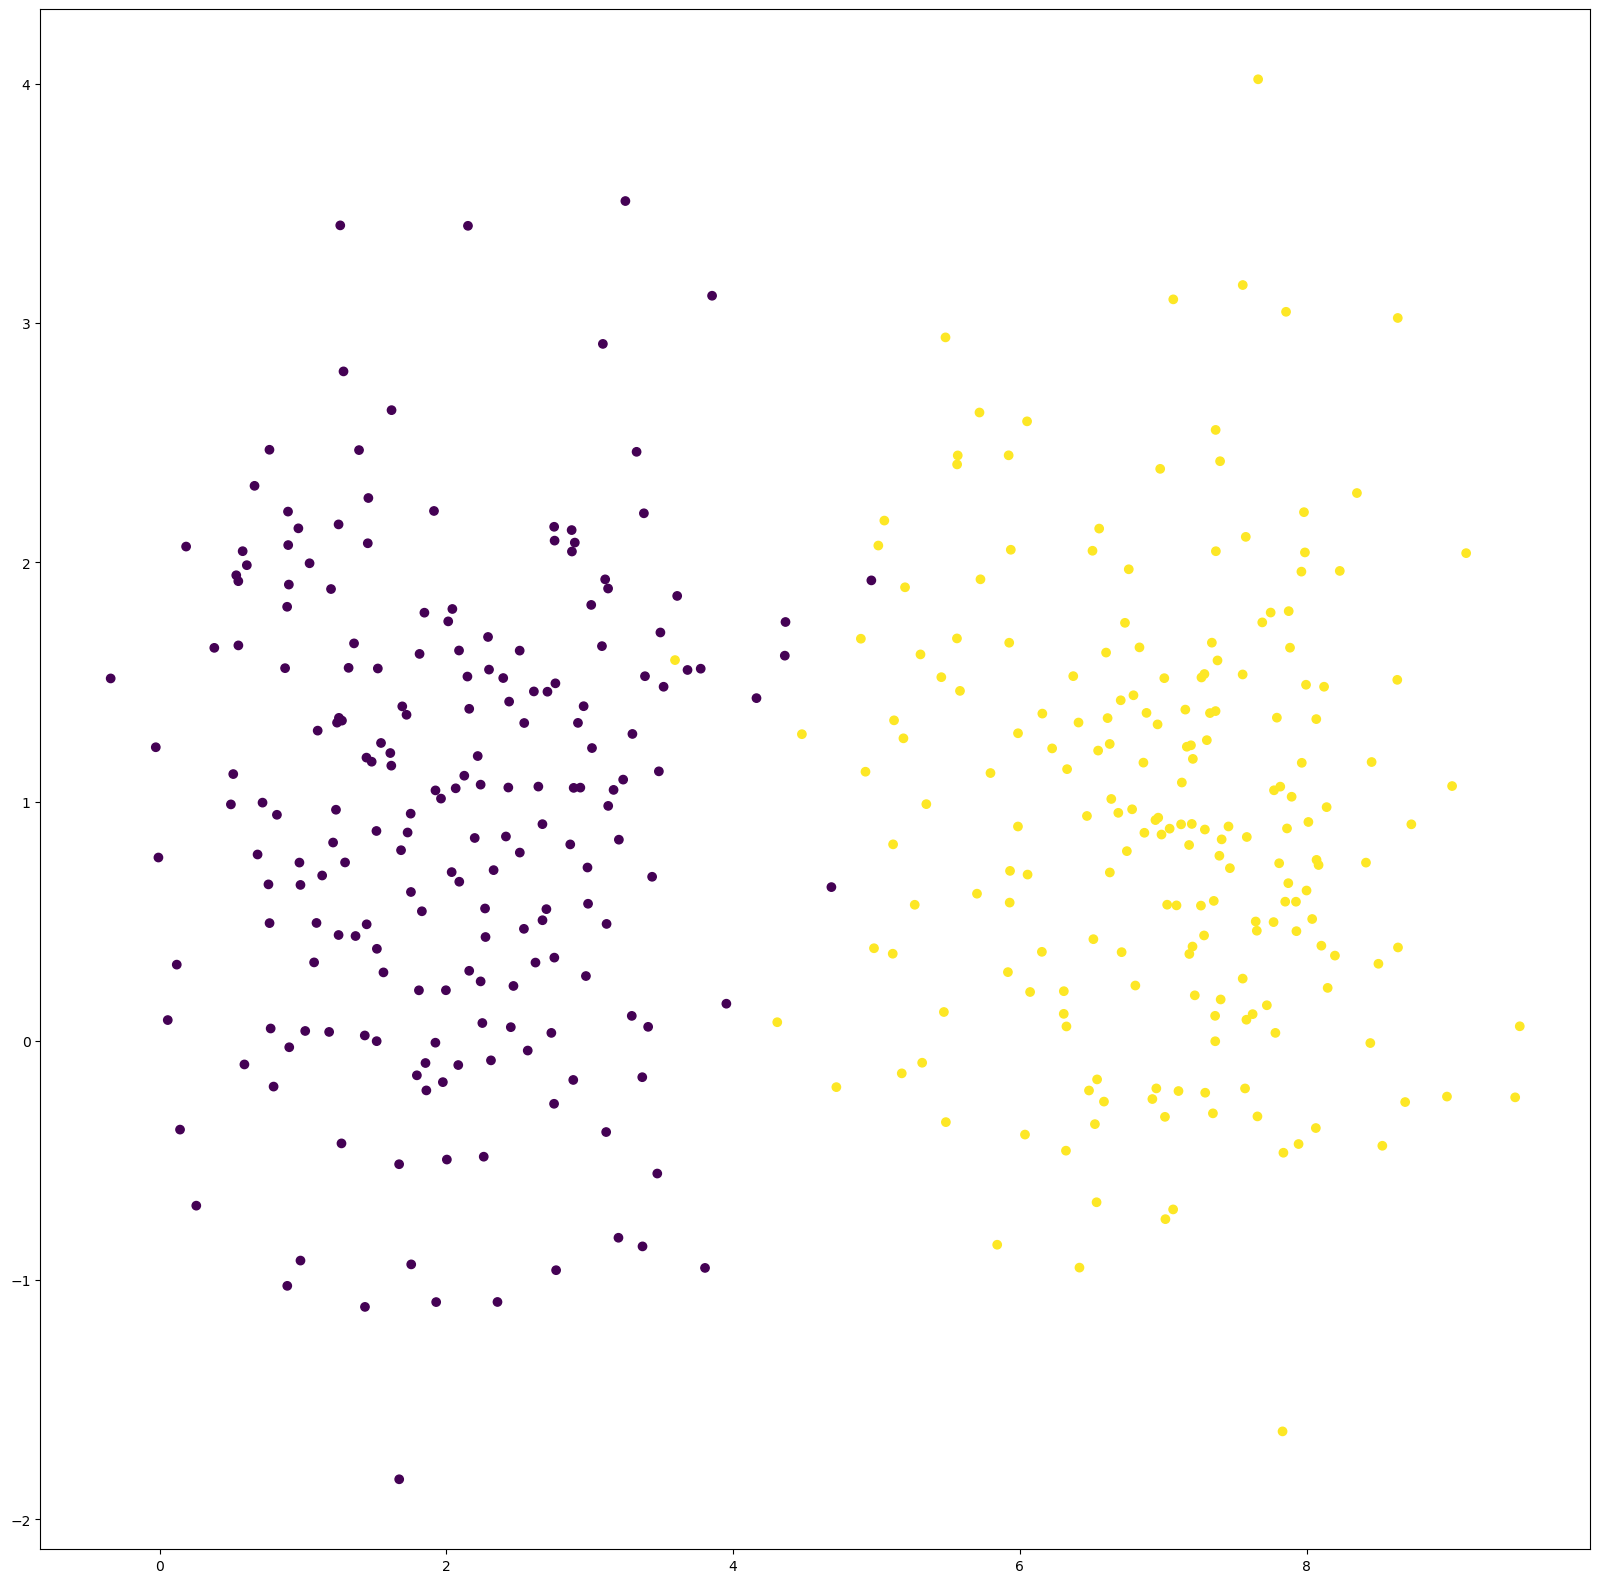

In [145]:
plt.figure(figsize = (PlotSize, PlotSize))

# data[:,0] is all x coord values
# c=classes means the first 200 values will be one color
# and the next 200 values will be a diff color  
plt.scatter(data[:,0], data[:,1], c=classes)
plt.show()